<a href="https://colab.research.google.com/github/NARAYANAN0101/DEEP-LEARNING/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Corrected spelling
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Corrected spelling
import numpy as np
from tensorflow.keras.preprocessing import image # Corrected import statemen

In [14]:
import zipfile

zip_file_path = '/content/archive (17).zip' # Replace with the actual path to your zip file
extract_path = '/content/'  # Replace with the desired extraction path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [15]:
#1)Load & preprocessing Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_image="/content/train"
test_image="/content/test"

train_data=train_datagen.flow_from_directory(
    train_image,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

test_data=test_datagen.flow_from_directory(
    test_image,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 555 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


In [16]:
from tensorflow.keras.models import Sequential # Corrected spelling
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Import CNN, Flatten and Dense layers

model = Sequential()
# Add Convolutional and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten()) # Flatten the output of the convolutional layers
model.add(Dense(256, activation='relu')) # Increased neurons
model.add(Dense(128, activation='relu')) # Added another dense layer with more neurons
model.add(Dense(64, activation='relu'))  # Added another dense layer
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,314,369 (5.01 MB)

 Trainable params: 1,314,369 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#4 Train Model
model.fit(train_data,validation_data=test_data,epochs=20)

#5 Evalute Model
loss,accuracy=model.evaluate(test_data)
print(f"Loss:{loss}")
print(f"Accuracy:{accuracy}")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.4921 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.4883 - loss: 0.6935 - val_accuracy: 0.5580 - val_loss: 0.6930
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.5581 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.4931 - loss: 0.6916 - val_accuracy: 0.6594 - val_loss: 0.6924
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.5362 - loss: 0.6896 - val_accuracy: 0.5072 - val_loss: 0.6936
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.5164 - loss: 0.6944 - val_accuracy: 0.5072 - val_loss: 0.6908
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.5862 - loss: 0.6838 - val_accuracy: 0.5725 - val_loss: 0.6868
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.6088 - loss: 0.6831 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


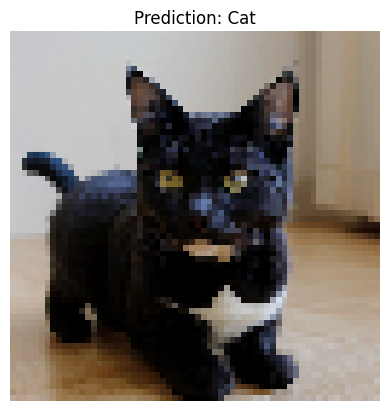

In [19]:
import matplotlib.pyplot as plt # Import matplotlib for visualization

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    # For binary output: prediction[0][0] close to 1 means 'Dog', close to 0 means 'Cat'
    if prediction[0][0] >= 0.5:
        prediction_text = "Dog"
    else:
        prediction_text = "Cat"

    # Display the image with the prediction
    plt.imshow(img)
    plt.title(f"Prediction: {prediction_text}")
    plt.axis('off')
    plt.show()

predict_image('/content/00488-200124798.png') # Replace with the path to your image